In [38]:
from qiskit import *
secret_number = '10011101'

In [39]:
circuit = QuantumCircuit(len(secret_number)+1, len(secret_number))

In [40]:
# setup first qubit in state -
circuit.x(len(secret_number))
circuit.h(len(secret_number))
circuit.barrier()

In [41]:
circuit.h(range(len(secret_number)))
circuit.barrier()

In [42]:
# setting up the blackbox

for ii, yesno in enumerate(reversed(secret_number)):
    if yesno == '1':
        circuit.cx(ii, len(secret_number))

circuit.barrier()

In [43]:
circuit.h(range(len(secret_number)))

In [44]:
circuit.measure(range(len(secret_number)), range(len(secret_number)))

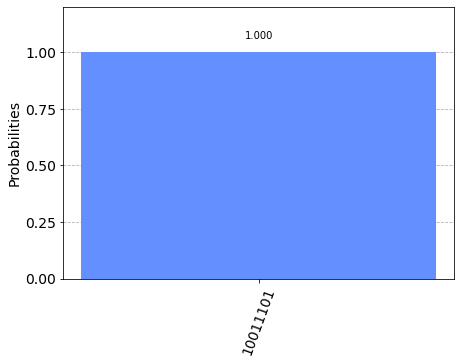

In [45]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator).result()
counts = result.get_counts(circuit)

from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

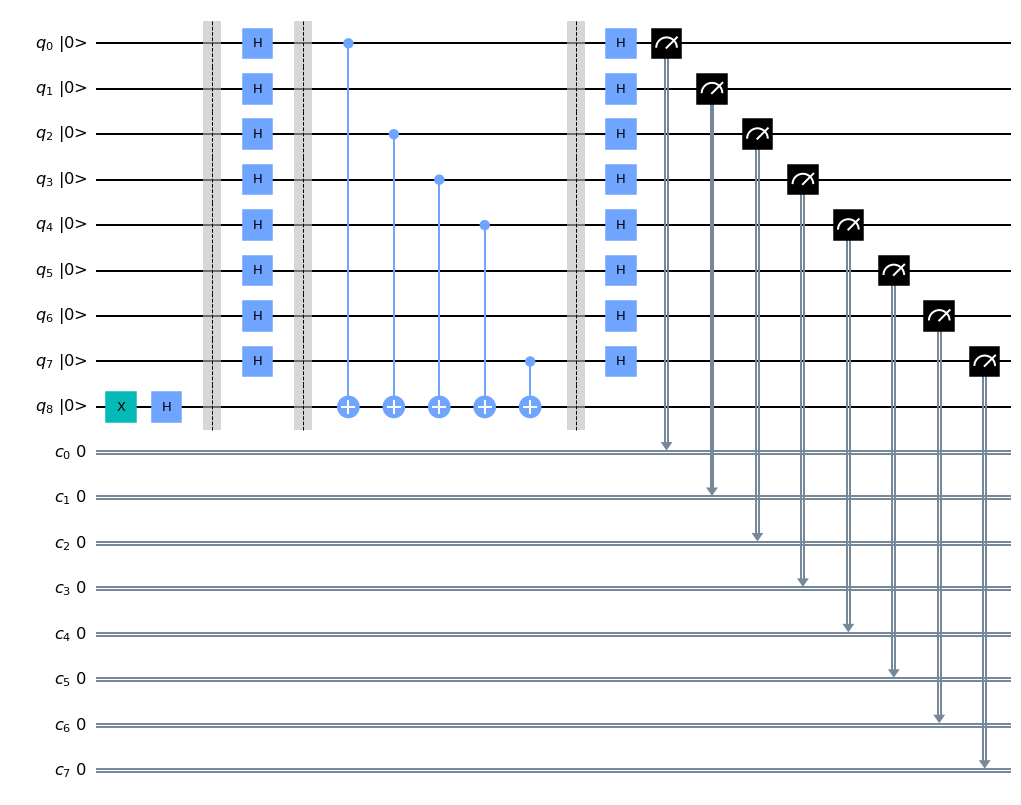

In [46]:
circuit.draw(initial_state=True, output='mpl', cregbundle=False)